# Chapter 5: Image segmentation

483
117


/home/rish/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: test.tif is a low contrast image
  return func(*args, **kwargs)


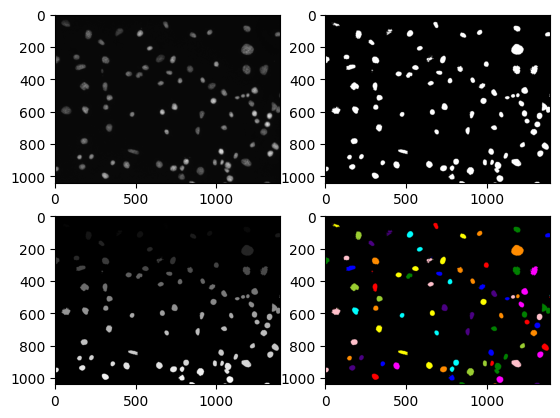

In [59]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# Load the cell images
img = ski.io.imread("data/F01_202w2.TIF")

# get the image histogram
hist, hist_centers = ski.exposure.histogram(img)

# get the Otsu threshold
otsu_thresh = ski.filters.threshold_otsu(img)
print(otsu_thresh)
# threshold the image
img_otsu = img > otsu_thresh

label_img = ski.morphology.label(img_otsu)

ski.io.imsave('test.tif', label_img)

print(label_img.max())
label_img_overlay = ski.color.label2rgb(label_img)

fig, ax =  plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 1].imshow(img_otsu, cmap = 'gray')
ax[1, 0].imshow(label_img, cmap = 'gray')
ax[1, 1].imshow(label_img_overlay)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
117
117


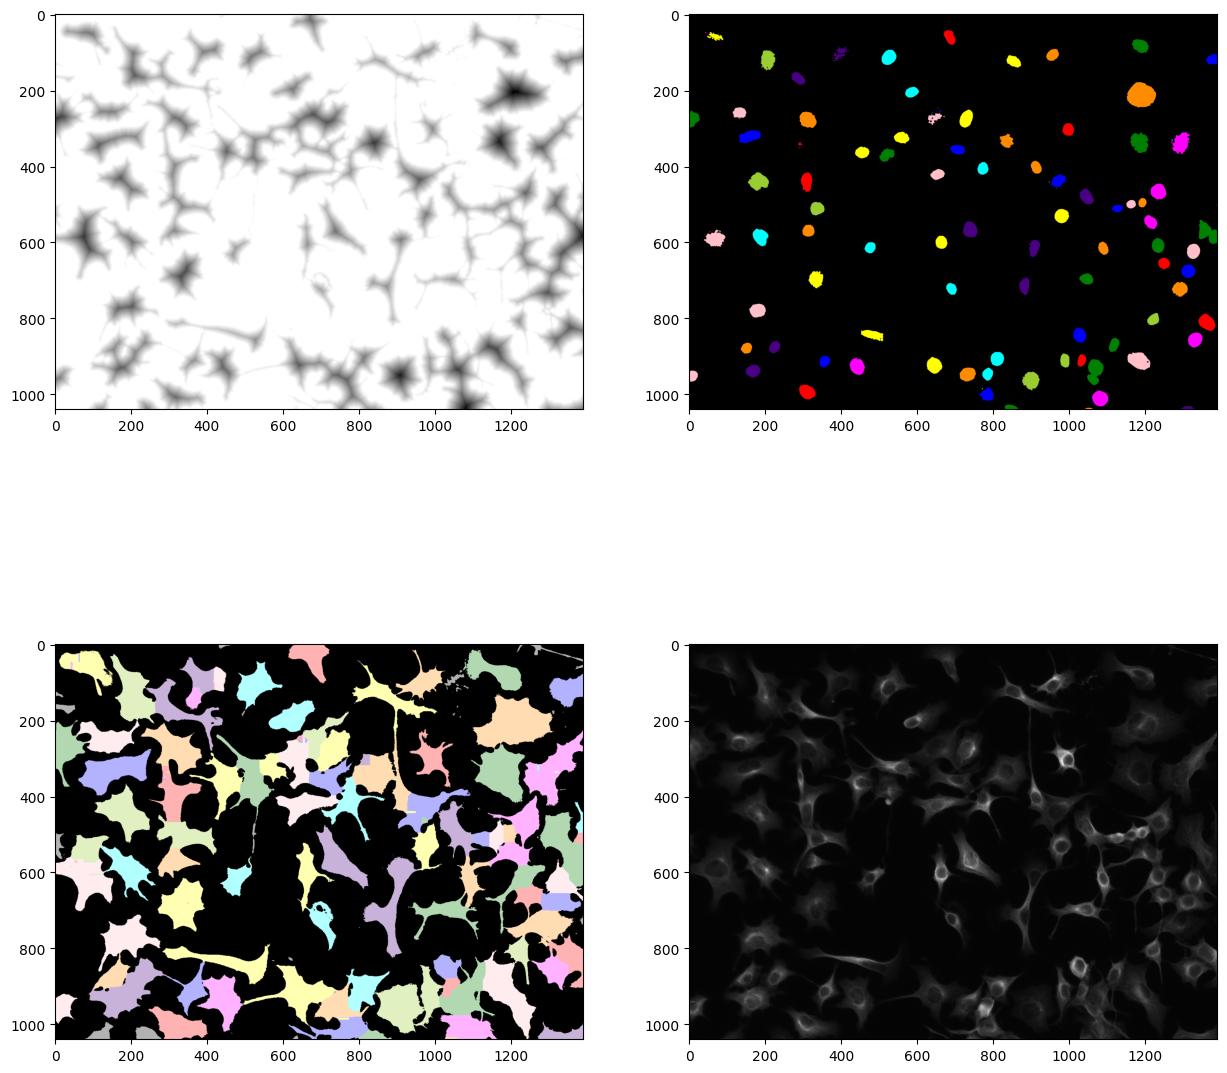

In [75]:
from scipy import ndimage as ndi

# Load the cell images
cyto = ski.io.imread("data/F01_202w1.TIF")
nuc = ski.io.imread("data/F01_202w2.TIF")

cyto_bin = cyto > ski.filters.threshold_triangle(cyto)
print(cyto_bin)

nuc_bin = nuc > ski.filters.threshold_otsu(nuc)
nuc_label = ski.morphology.label(nuc_bin)
print(nuc_label.max())

cyto_dist = ndi.distance_transform_edt(cyto_bin)

labels = ski.segmentation.watershed(-cyto_dist, markers = nuc_label, mask = cyto_bin)
print(labels.max())
label_img_overlay = ski.color.label2rgb(labels, cyto_bin)

fig, ax =  plt.subplots(2, 2, figsize = (15, 15))
ax[0, 0].imshow(-cyto_dist, cmap = 'gray')
ax[0, 1].imshow(ski.color.label2rgb(nuc_label), cmap = 'gray')
ax[1, 0].imshow(label_img_overlay, cmap = 'gray')
ax[1, 1].imshow(cyto, cmap = 'gray')